In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Colab Notebooks/AV/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [4]:
ls 'gdrive/My Drive/Colab Notebooks/AV'

 catboost_training.json   meta.tsv                        test_error.tsv
'Club Mahindra.ipynb'     sample_submission_DLC0JKW.zip   time_left.tsv
 learn/                   test/                           train.csv
 learn_error.tsv          test.csv


In [5]:
train.head().sort_values('booking_date')

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602


In [0]:
train.drop(train[train['roomnights']<0].index, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)
split= train.shape[0]

In [7]:
split

341423

In [0]:
def datetime(x):
  return x[:-2]+'20'+x[-2:]
  

In [9]:
train.amount_spent_per_room_night_scaled.describe()

count    341423.000000
mean          7.720801
std           1.090111
min           1.600397
25%           7.187260
50%           7.860816
75%           8.419147
max          10.816652
Name: amount_spent_per_room_night_scaled, dtype: float64

In [10]:
#skewness and kurtosis
print("Skewness: %f" % train.amount_spent_per_room_night_scaled.skew())
print("Kurtosis: %f" % train.amount_spent_per_room_night_scaled.kurt())

Skewness: -0.923228
Kurtosis: 1.814949


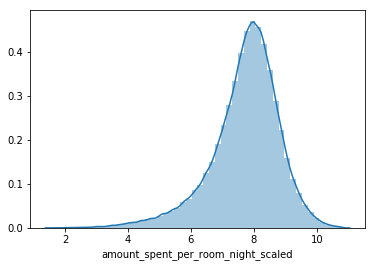

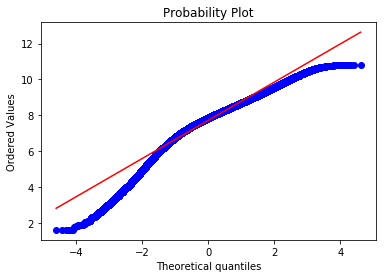

In [11]:
#histogram and normal probability plot
from scipy import stats 
import matplotlib.pyplot as plt

sns.distplot(train.amount_spent_per_room_night_scaled);
fig = plt.figure()
res = stats.probplot(train.amount_spent_per_room_night_scaled, plot=plt)

In [12]:
split

341423

**Relationship with continuos variabls**

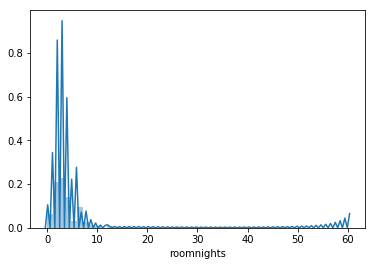

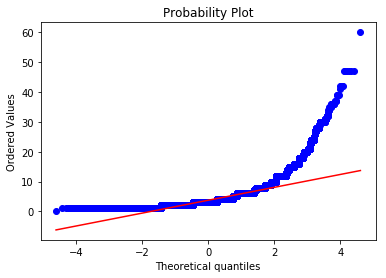

In [13]:
sns.distplot(train.roomnights)
fig = plt.figure()
res = stats.probplot(train.roomnights, plot=plt)

In [14]:
#skewness and kurtosis

print("Skewness: %f" % np.log1p(train.roomnights).skew())
print("Kurtosis: %f" % np.log1p(train.roomnights).kurt())

Skewness: 0.565778
Kurtosis: 0.656259


In [15]:
#skewness and kurtosis

print("Skewness: %f" % np.log1p(train.numberofadults).skew())
print("Kurtosis: %f" % np.log1p(train.numberofadults).kurt())

Skewness: 1.030085
Kurtosis: 1.335043


In [16]:
#skewness and kurtosis

print("Skewness: %f" % np.log1p(train.numberofchildren).skew())
print("Kurtosis: %f" % np.log1p(train.numberofchildren).kurt())

Skewness: 1.643503
Kurtosis: 1.311611


In [0]:
#train.drop(train[train.roomnights < 0].index, axis =0, inplace =True)

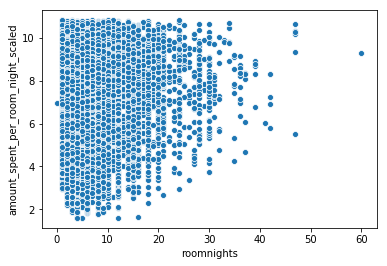

In [18]:
var = 'roomnights'
#data = pd.concat([train.amount_spent_per_room_night_scaled, train[var]], axis=1)
sns.scatterplot(x=(train[var]), y=train['amount_spent_per_room_night_scaled'])

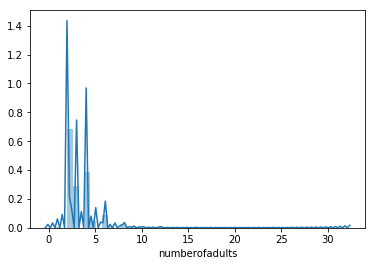

In [19]:
sns.distplot(train.numberofadults)

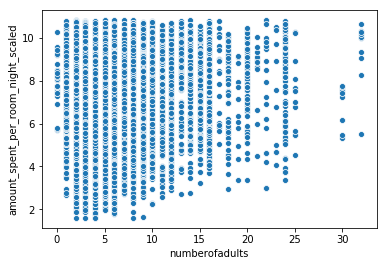

In [20]:
var = 'numberofadults'
#data = pd.concat([train.amount_spent_per_room_night_scaled, train[var]], axis=1)
sns.scatterplot(x=var, y='amount_spent_per_room_night_scaled', data= train)

In [0]:
#train.roomnights = detect_outlier(train, 'roomnights')



In [0]:
cont_col = ['numberofadults', 'numberofchildren', 'total_pax', 'roomnights']

In [0]:
#train.reservationstatusid_code.mode()

**Outliers Alert**

In [23]:
full_df = pd.concat([train,test], sort =False); full_df.shape


(488188, 24)

In [24]:
full_df.loc[:,['numberofadults','numberofchildren', 'total_pax']].head(10)

,numberofadults,numberofchildren,total_pax
0,2,0,3
1,2,0,2
2,2,0,2
3,2,2,2
4,2,0,2
5,2,0,2
6,2,0,1
7,2,2,4
8,2,0,2
9,2,0,2


In [0]:
#full_df['family_size'] = full_df.apply(lambda x: 1 if (x['numberofadults'] > 0 & x['numberofchildren']>0) else 0, axis =1)

In [0]:
full_df.booking_date = full_df.booking_date.apply(lambda x: datetime(x))
full_df.checkin_date = full_df.checkin_date.apply(lambda x: datetime(x))
full_df.checkout_date = full_df.checkout_date.apply(lambda x: datetime(x))

In [27]:
full_df.isnull().sum()

reservation_id                             0
booking_date                               0
checkin_date                               0
checkout_date                              0
channel_code                               0
main_product_code                          0
numberofadults                             0
numberofchildren                           0
persontravellingid                         0
resort_region_code                         0
resort_type_code                           0
room_type_booked_code                      0
roomnights                                 0
season_holidayed_code                    149
state_code_residence                    7024
state_code_resort                          0
total_pax                                  0
member_age_buckets                         0
booking_type_code                          0
memberid                                   0
cluster_code                               0
reservationstatusid_code                   0
resort_id 

In [0]:
full_df.season_holidayed_code.fillna(full_df.season_holidayed_code.mode()[0], inplace=True)
full_df.state_code_residence.fillna(full_df.state_code_residence.mode()[0], inplace=True)

In [0]:
full_df.booking_date = pd.to_datetime(full_df.booking_date, format='%d/%m/%Y')
full_df.checkin_date = pd.to_datetime(full_df.checkin_date, format='%d/%m/%Y')
full_df.checkout_date= pd.to_datetime(full_df.checkout_date, format='%d/%m/%Y')

In [30]:
full_df.booking_date.dt.month.value_counts()

1     47181
2     42832
12    42721
9     42502
3     41974
10    40629
5     39755
8     39102
11    38934
6     37948
7     37882
4     36728
Name: booking_date, dtype: int64

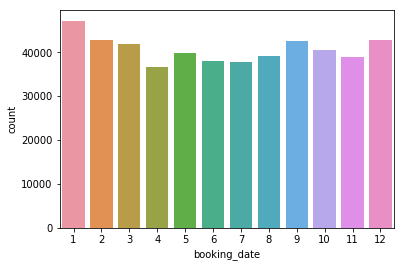

In [31]:
sns.countplot(full_df.booking_date.dt.month)

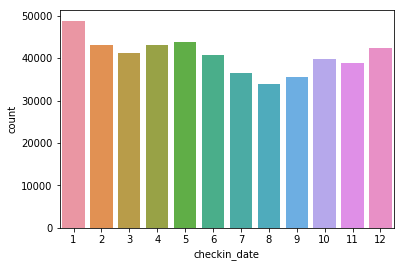

In [32]:
sns.countplot(full_df.checkin_date.dt.month)

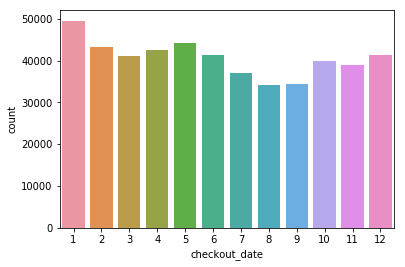

In [33]:
sns.countplot(full_df.checkout_date.dt.month)

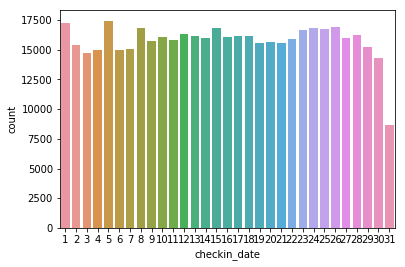

In [34]:
sns.countplot(full_df.checkin_date.dt.day)
#full_df.checkin_date.dt.day.value_counts()


In [0]:
#sns.countplot(full_df.checkout_date-full_df.checkin_date)

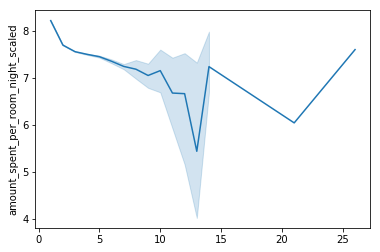

In [36]:
sns.lineplot(x= (full_df.checkout_date-full_df.checkin_date).dt.days, y=full_df['amount_spent_per_room_night_scaled'])

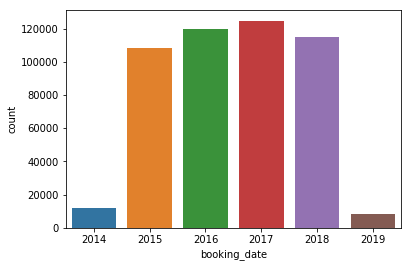

In [37]:
# Number of booking yearwise
sns.countplot(full_df.booking_date.dt.year)

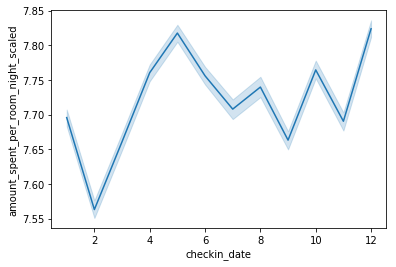

In [38]:
sns.lineplot(x=full_df['checkin_date'].dt.month, y=full_df['amount_spent_per_room_night_scaled'])

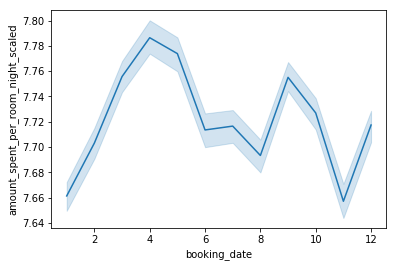

In [39]:
sns.lineplot(x=full_df['booking_date'].dt.month, y=full_df['amount_spent_per_room_night_scaled'])

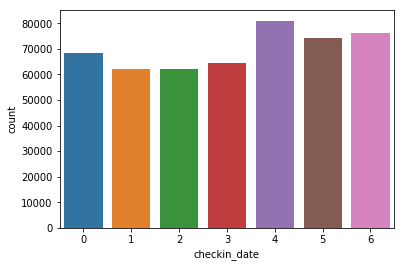

In [40]:
sns.countplot(full_df.checkin_date.dt.dayofweek)

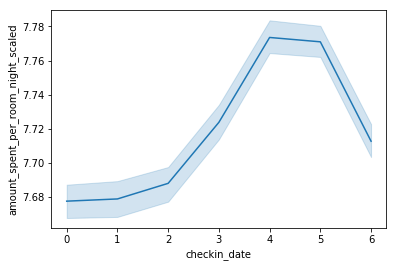

In [41]:
sns.lineplot(x = full_df.checkin_date.dt.dayofweek,  y=full_df['amount_spent_per_room_night_scaled'])

In [0]:
#@title EDA Channel

In [43]:
full_df.channel_code.value_counts()

1    230505
3    182950
2     74733
Name: channel_code, dtype: int64

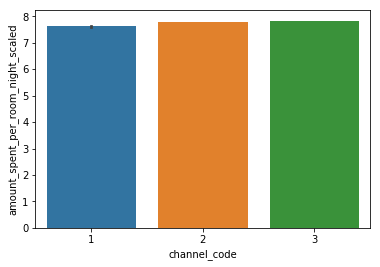

In [44]:
sns.barplot(x=full_df['channel_code'], y=full_df['amount_spent_per_room_night_scaled'])

In [45]:
# EDA
full_df.main_product_code.value_counts()

2    253953
3    123267
1     82844
4     26588
7      1536
Name: main_product_code, dtype: int64

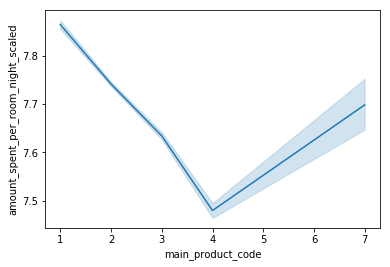

In [46]:
sns.lineplot(x=full_df.main_product_code, y= full_df.amount_spent_per_room_night_scaled)

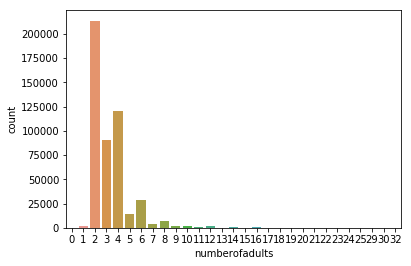

In [47]:
sns.countplot(full_df.numberofadults)

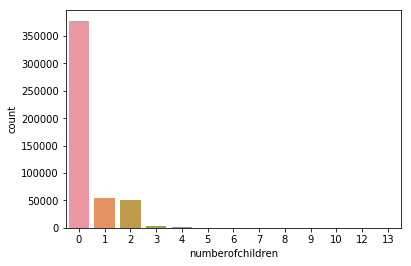

In [48]:
sns.countplot(full_df.numberofchildren)

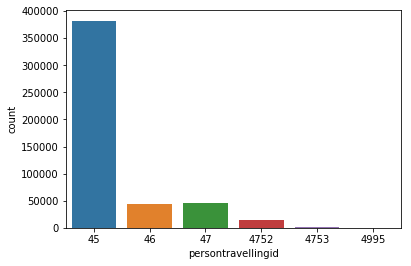

In [49]:
sns.countplot(full_df.persontravellingid)

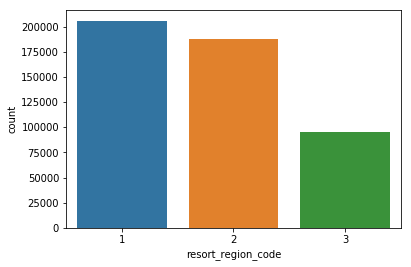

In [50]:
sns.countplot(full_df.resort_region_code)

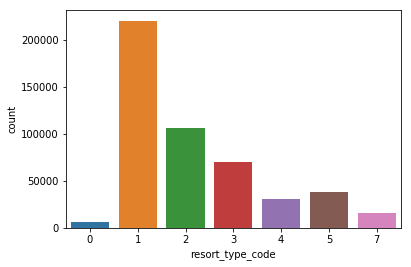

In [51]:
sns.countplot(full_df.resort_type_code)

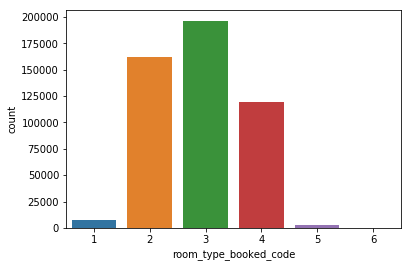

In [52]:
sns.countplot(full_df.room_type_booked_code)

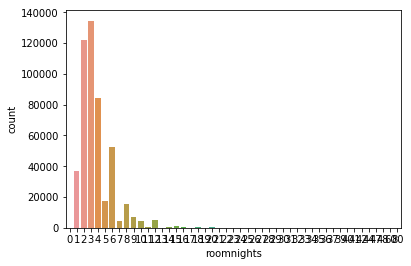

In [53]:
sns.countplot(full_df.roomnights)
sns.set(rc={'figure.figsize':(20,8.27)})

In [54]:
full_df.season_holidayed_code.value_counts()

2.0    181013
3.0    169639
4.0     99276
1.0     38260
Name: season_holidayed_code, dtype: int64

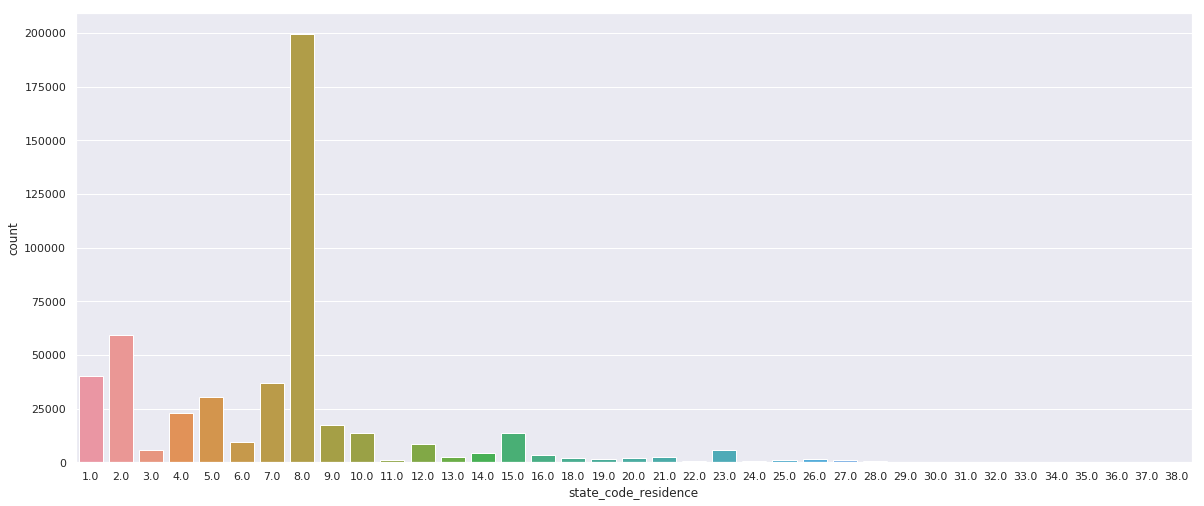

In [55]:
sns.countplot(full_df.state_code_residence)

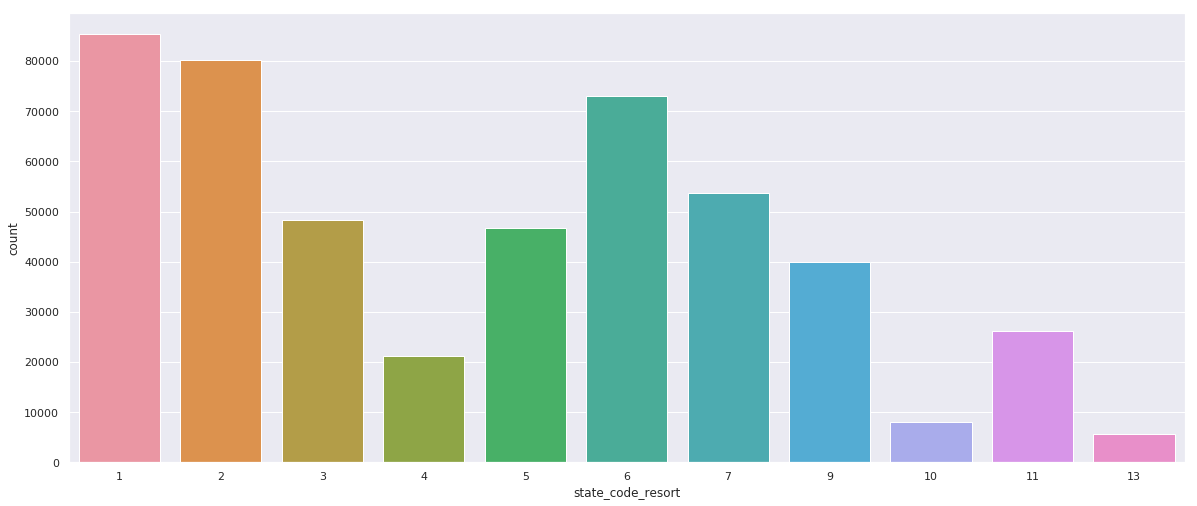

In [56]:
sns.countplot(full_df.state_code_resort)
sns.set(rc={'figure.figsize':(8,8.27)})

In [57]:
full_df.total_pax.value_counts()

2     151877
3     140730
4     139248
5      29552
6      11826
1       8464
7       4415
8       1551
9        346
10       102
11        25
0         24
12        17
21         4
13         3
20         2
14         1
24         1
Name: total_pax, dtype: int64

In [58]:

full_df.member_age_buckets.value_counts()

D    95951
E    95642
F    73197
C    64776
H    54663
G    52001
B    27560
I    12055
A    10316
J     2027
Name: member_age_buckets, dtype: int64

In [59]:
full_df.booking_type_code.value_counts()

1    427676
2     60512
Name: booking_type_code, dtype: int64

In [60]:
full_df.cluster_code.value_counts()

F    172769
E     85361
D     80128
B     53626
C     53604
A     42700
Name: cluster_code, dtype: int64

In [61]:
full_df.reservationstatusid_code.value_counts()

A    446742
B     21240
C     20205
D         1
Name: reservationstatusid_code, dtype: int64

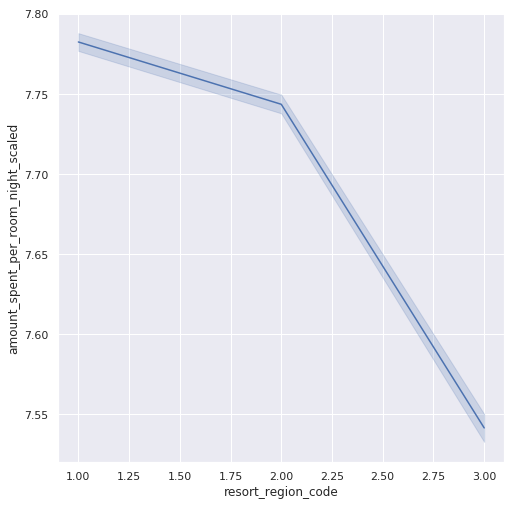

In [62]:
sns.lineplot(x=full_df.resort_region_code, y= full_df.amount_spent_per_room_night_scaled)

In [0]:
# Features from dates

full_df['stay_duration'] = (full_df.checkout_date-full_df.checkin_date).dt.days
full_df['booking_month']= full_df.booking_date.dt.month
full_df['stay_month'] = full_df.checkin_date.dt.month
full_df['checkin_day'] = full_df.checkin_date.dt.dayofweek
full_df['advance_days_booked'] =  (full_df.checkin_date-full_df.booking_date).dt.days
full_df['weekends'] = full_df.checkin_day.apply(lambda x: 1 if x in [4,5,6] else 0)

In [0]:
full_df['total_pax'] = full_df.apply(lambda x : x['numberofadults']+ x['numberofchildren'] 
                                   if (x['numberofadults']+ x['numberofchildren']) > x['total_pax'] else x['total_pax'], axis =1) 
#full_df.total_pax = full_df.numberofadults + full_df.numberofchildren

In [0]:
full_df.persontravellingid = full_df.persontravellingid.replace({45 : 'A', 47: 'B', 46: 'C', 4752: 'D',4753: 'E', 4995:'F'})

In [66]:
# feature analyisis of persontravellingid

full_df.persontravellingid.value_counts()

A    382099
B     45062
C     43949
D     15102
E      1946
F        30
Name: persontravellingid, dtype: int64

In [0]:
train.persontravellingid = train.persontravellingid.replace({45 : 'A', 47: 'B', 46: 'C', 4752: 'D',4753: 'E', 4995:'F'})
D= dict(train.groupby(['persontravellingid'], as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).\
rename(columns ={'amount_spent_per_room_night_scaled':'avg_spent'}).values)
#D
#full_df['person_rank'] = full_df.persontravellingid.map(D)

#full_df.person_rank.head()

In [68]:
full_df.resort_region_code.value_counts()

1    205750
2    187358
3     95080
Name: resort_region_code, dtype: int64

In [69]:
train.groupby('room_type_booked_code').agg({'amount_spent_per_room_night_scaled': np.mean})

,amount_spent_per_room_night_scaled
room_type_booked_code,
1,7.867644
2,7.815496
3,7.659717
4,7.679382
5,7.923047
6,7.896270


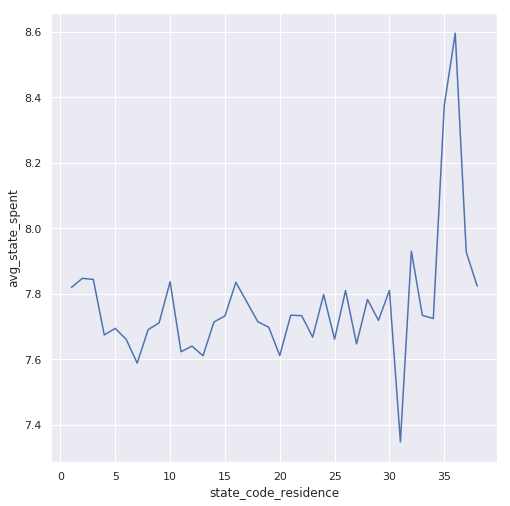

In [70]:
temp_state = train.groupby('state_code_residence', as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).rename(columns ={'amount_spent_per_room_night_scaled':'avg_state_spent'})
temp_state['state_cat'] = pd.cut(temp_state['avg_state_spent'], bins=[0,7.7, 8.8], right=True, labels=False)+1

D = dict(zip(temp_state.state_code_residence, temp_state.state_cat))

#full_df['state_choice'] = full_df.state_code_residence.map(D) Did not work
sns.lineplot(x='state_code_residence', y='avg_state_spent', data= temp_state)

In [71]:
full_df.main_product_code.value_counts()

2    253953
3    123267
1     82844
4     26588
7      1536
Name: main_product_code, dtype: int64

In [0]:
temp=pd.DataFrame()
var= 'member_age_buckets'

temp[var] = train.groupby(var, as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).\
rename(columns ={'amount_spent_per_room_night_scaled':'avg_spent'})[var]

temp['rank'] = train.groupby(var, as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).\
rename(columns ={'amount_spent_per_room_night_scaled':'avg_spent'})['avg_spent'].rank(ascending=False)
D= dict(zip(temp[var], temp['rank']))

#full_df['member_choice'] = full_df[var].map(D)


In [0]:
D= dict(train.groupby(['resort_region_code'], as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).\
rename(columns ={'amount_spent_per_room_night_scaled':'avg_spent'}).values)

#full_df['rrc_rank'] = full_df.resort_region_code.map(D)

In [0]:
#train.groupby(['resort_region_code', 'resort_type_code'], as_index=False).agg({'amount_spent_per_room_night_scaled': np.mean}).\
#rename(columns ={'amount_spent_per_room_night_scaled':'avg_spent'}).to_dict()

In [0]:
#sns.distplot(full_df.rrc_rank)

**OUTLIER TREATMENT**

In [0]:
#!pip3 install pyod

In [0]:
#full_df.amount_spent_per_room_night_scaled

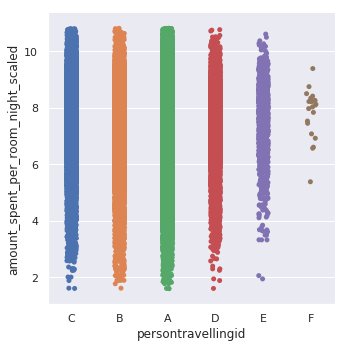

In [78]:
#sns.jointplot(x='persontravellingid', y='resort_region_code', data=full_df)
sns.catplot(x='persontravellingid', y='amount_spent_per_room_night_scaled', data =full_df)

In [0]:
#sns.lineplot(x= full_df.advance_days_booked, y=full_df.amount_spent_per_room_night_scaled)

In [0]:
full_df.drop(['checkout_date', 'checkin_date', 'booking_date', 'resort_id'], axis=1, inplace= True)

In [0]:
full_df.room_type_booked_code = full_df.room_type_booked_code.astype(str)
full_df.resort_type_code = full_df.resort_type_code.astype(str)
full_df.resort_region_code = full_df.resort_region_code.astype(str)
full_df.channel_code =full_df.channel_code.astype(str)
full_df.persontravellingid = full_df.persontravellingid.astype(str)
full_df.main_product_code = full_df.main_product_code.astype(str)
full_df.state_code_resort = full_df.state_code_resort.astype(str)
full_df.booking_type_code = full_df.booking_type_code.astype(str)
full_df.season_holidayed_code = full_df.season_holidayed_code.astype(str)
full_df.state_code_resort = full_df.state_code_resort.astype(str)
full_df.booking_month = full_df.booking_month.astype(str)
full_df.stay_month = full_df.stay_month.astype(str)


In [0]:
def getCountVar(compute_df, count_df, var_name):
        grouped_df = count_df.groupby(var_name)
        count_dict = {}
        for name, group in grouped_df:
                count_dict[name] = group.shape[0]

        count_list = []
        for index, row in compute_df.iterrows():
                name = row[var_name]
                count_list.append(count_dict.get(name, 0))
        return count_list
      
      

In [0]:
full_df.channel_code = getCountVar(full_df, full_df, 'channel_code')
full_df.main_product_code = getCountVar(full_df, full_df, 'main_product_code')
full_df.persontravellingid = getCountVar(full_df, full_df, 'persontravellingid')


In [104]:
full_df.dtypes

channel_code                  int64
main_product_code             int64
numberofadults                int64
numberofchildren              int64
persontravellingid            int64
resort_region_code           object
resort_type_code             object
room_type_booked_code        object
roomnights                    int64
season_holidayed_code        object
state_code_residence        float64
state_code_resort            object
total_pax                     int64
member_age_buckets           object
booking_type_code            object
cluster_code                 object
reservationstatusid_code     object
stay_duration                 int64
booking_month                object
stay_month                   object
checkin_day                   int64
advance_days_booked           int64
weekends                      int64
dtype: object

In [0]:
y= full_df.iloc[:split,full_df.columns.get_loc('amount_spent_per_room_night_scaled')]

In [0]:
full_df.drop('amount_spent_per_room_night_scaled', axis=1, inplace=True)

In [0]:
# Drop the ids
full_df.drop(['reservation_id', 'memberid'], axis=1, inplace=True)

In [90]:
full_df.dtypes

channel_code                  int64
main_product_code            object
numberofadults                int64
numberofchildren              int64
persontravellingid           object
resort_region_code           object
resort_type_code             object
room_type_booked_code        object
roomnights                    int64
season_holidayed_code        object
state_code_residence        float64
state_code_resort            object
total_pax                     int64
member_age_buckets           object
booking_type_code            object
cluster_code                 object
reservationstatusid_code     object
stay_duration                 int64
booking_month                object
stay_month                   object
checkin_day                   int64
advance_days_booked           int64
weekends                      int64
dtype: object

In [91]:
categorical_features_indices = np.where(full_df.dtypes == "object"); categorical_features_indices

(array([ 1,  4,  5,  6,  7,  9, 11, 13, 14, 15, 16, 18, 19]),)

In [92]:
full_df.stay_month.head()

0     4
1     4
2     2
3     6
4    12
Name: stay_month, dtype: object

In [0]:
X= full_df.iloc[:split,:]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [95]:
categorical_features_indices

(array([ 1,  4,  5,  6,  7,  9, 11, 13, 14, 15, 16, 18, 19]),)

In [96]:
!pip3 install catboost
#!pip3 install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 60.6MB 49.0MB/s 


In [97]:
full_df.isnull().sum()

channel_code                0
main_product_code           0
numberofadults              0
numberofchildren            0
persontravellingid          0
resort_region_code          0
resort_type_code            0
room_type_booked_code       0
roomnights                  0
season_holidayed_code       0
state_code_residence        0
state_code_resort           0
total_pax                   0
member_age_buckets          0
booking_type_code           0
cluster_code                0
reservationstatusid_code    0
stay_duration               0
booking_month               0
stay_month                  0
checkin_day                 0
advance_days_booked         0
weekends                    0
dtype: int64

In [0]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=5000, learning_rate=0.01, depth=8, loss_function='RMSE', train_dir=path, task_type = "GPU")

In [99]:
model.fit(X_train, y_train,cat_features=categorical_features_indices[0], eval_set=(X_validation, y_validation),plot=True, use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7.7206045	test: 7.7216139	best: 7.7216139 (0)	total: 82.5ms	remaining: 6m 52s
1:	learn: 7.6449433	test: 7.6458782	best: 7.6458782 (1)	total: 152ms	remaining: 6m 20s
2:	learn: 7.5700628	test: 7.5709785	best: 7.5709785 (2)	total: 206ms	remaining: 5m 43s
3:	learn: 7.4959461	test: 7.4968272	best: 7.4968272 (3)	total: 258ms	remaining: 5m 22s
4:	learn: 7.4226878	test: 7.4235909	best: 7.4235909 (4)	total: 335ms	remaining: 5m 34s
5:	learn: 7.3500597	test: 7.3509562	best: 7.3509562 (5)	total: 395ms	remaining: 5m 28s
6:	learn: 7.2782119	test: 7.2790661	best: 7.2790661 (6)	total: 441ms	remaining: 5m 14s
7:	learn: 7.2071010	test: 7.2079463	best: 7.2079463 (7)	total: 485ms	remaining: 5m 2s
8:	learn: 7.1367022	test: 7.1375270	best: 7.1375270 (8)	total: 530ms	remaining: 4m 53s
9:	learn: 7.0670216	test: 7.0678863	best: 7.0678863 (9)	total: 579ms	remaining: 4m 48s
10:	learn: 6.9980520	test: 6.9989044	best: 6.9989044 (10)	total: 630ms	remaining: 4m 45s
11:	learn: 6.9297404	test: 6.9306129	best

In [100]:
print(*zip(model.feature_names_, model.feature_importances_))

('channel_code', 1.690373626023018) ('main_product_code', 3.570898550846232) ('numberofadults', 5.880695813013121) ('numberofchildren', 1.672486657513241) ('persontravellingid', 5.841179596579761) ('resort_region_code', 1.8524889531004025) ('resort_type_code', 3.4948037231654845) ('room_type_booked_code', 3.3236955909578283) ('roomnights', 8.911318155270633) ('season_holidayed_code', 2.9189312747751437) ('state_code_residence', 4.258030583555844) ('state_code_resort', 6.266556279019143) ('total_pax', 8.704953408299918) ('member_age_buckets', 2.8021903421451078) ('booking_type_code', 1.0510719674307027) ('cluster_code', 2.9577211609378864) ('reservationstatusid_code', 1.119104218083794) ('stay_duration', 22.258245150479382) ('booking_month', 2.798802094615469) ('stay_month', 3.480358930351857) ('checkin_day', 0.8090483177592164) ('advance_days_booked', 3.839253296827396) ('weekends', 0.49779230924984247)


In [101]:
print("Model Evaluation Stage")
print(model.get_params())

Model Evaluation Stage
{'task_type': 'GPU', 'train_dir': 'gdrive/My Drive/Colab Notebooks/AV/', 'loss_function': 'RMSE', 'depth': 8, 'learning_rate': 0.01, 'iterations': 5000}


In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

val_cb = model.predict(X_validation)
rms = sqrt(mean_squared_error(y_validation, model.predict(X_validation)))
rms

0.9959553175044861

In [0]:
X_test = full_df.iloc[split:,:]
y_pred_cb =model.predict(X_test)

In [0]:
temp = pd.DataFrame(columns=['reservation_id', 'amount_spent_per_room_night_scaled'])
temp.reservation_id = test.reservation_id
temp.amount_spent_per_room_night_scaled = y_pred_cb
temp.to_csv('pred.csv', index=False)
from google.colab import files
#files.download('pred.csv') 

In [0]:
cats= list(full_df.columns.to_list()[elem] for elem in np.where(full_df.dtypes == 'object')[0])

In [0]:
# convert categorical data to label encoder

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
df_le =  MultiColumnLabelEncoder(columns=cats).fit_transform(full_df)

In [0]:
X_train, X_validation, y_train, y_validation = train_test_split(df_le.iloc[:split,:], y, train_size=0.7, random_state=1234)

X_test= df_le.iloc[split:, :]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=1000)
regr.fit(X_train, y_train)


y_pred_rf = regr.predict(X_test)
val_rf= regr.predict(X_validation)
rms = sqrt(mean_squared_error(y_validation, val_rf))
rms

1.0180934686108896

In [0]:
import xgboost

In [0]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)
val_xgb= xgb.predict(X_validation)
rms = sqrt(mean_squared_error(y_validation, val_xgb))
rms

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.99909820482769

In [0]:
#X_test.head()

In [0]:
import lightgbm as lgb
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}



lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_validation, y_validation, reference=lgb_train)


gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

val_lgb = gbm.predict(X_validation)
y_pred_lgb = gbm.predict(X_test)

[1]	valid_0's l1: 0.817396	valid_0's l2: 1.19586
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 0.812378	valid_0's l2: 1.18296
[3]	valid_0's l1: 0.807808	valid_0's l2: 1.17136
[4]	valid_0's l1: 0.803626	valid_0's l2: 1.16072
[5]	valid_0's l1: 0.799853	valid_0's l2: 1.15123
[6]	valid_0's l1: 0.79745	valid_0's l2: 1.1458
[7]	valid_0's l1: 0.794251	valid_0's l2: 1.13776
[8]	valid_0's l1: 0.791259	valid_0's l2: 1.13022
[9]	valid_0's l1: 0.789392	valid_0's l2: 1.12604
[10]	valid_0's l1: 0.786737	valid_0's l2: 1.11935
[11]	valid_0's l1: 0.784286	valid_0's l2: 1.11317
[12]	valid_0's l1: 0.781996	valid_0's l2: 1.10751
[13]	valid_0's l1: 0.779987	valid_0's l2: 1.10247
[14]	valid_0's l1: 0.777976	valid_0's l2: 1.09743
[15]	valid_0's l1: 0.776176	valid_0's l2: 1.09295
[16]	valid_0's l1: 0.774624	valid_0's l2: 1.08912
[17]	valid_0's l1: 0.773148	valid_0's l2: 1.08541
[18]	valid_0's l1: 0.771573	valid_0's l2: 1.08157
[19]	valid_0's l1: 0.770128	valid_0's l2: 1.07805

In [0]:
y_pred_xgb = gbm.predict(X_test)
val_xgb = gbm.predict(X_validation)
rms = sqrt(mean_squared_error(y_validation, xgb.predict(X_validation)))
rms

0.99909820482769

In [0]:
#y_validation

In [0]:
temp_1 = pd.DataFrame(columns=['reservation_id', 'pred_cb', 'pred_xgb', 'pred_rf', 'pred_lgb'])

temp_1.pred_xgb = val_xgb
temp_1.pred_lgb= val_lgb
temp_1.pred_cb = val_cb
temp_1.pred_rf = val_rf

temp_1.reservation_id = test.reservation_id

temp_1['Amount'] = y_validation.to_list()

In [0]:
temp_1.head()

,reservation_id,pred_cb,pred_xgb,pred_rf,pred_lgb,Amount
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.354520,7.369978,7.472044,7.369978,7.344189
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.542707,7.721597,7.970026,7.721597,8.233095
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.838908,7.807212,7.664334,7.807212,8.714975
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.919988,7.977214,7.733518,7.977214,7.827418
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,6.826790,6.915953,7.039105,6.915953,3.915816


In [0]:
test_1= pd.DataFrame(columns=['reservation_id', 'pred_cb', 'pred_xgb', 'pred_rf', 'pred_lgb'] )

test_1.pred_xgb = y_pred_xgb
test_1.pred_lgb= y_pred_lgb
test_1.pred_cb = y_pred_cb
test_1.pred_rf = y_pred_rf

test_1.reservation_id = test.reservation_id


In [0]:
test.shape

(146765, 23)

In [0]:
from sklearn.linear_model import LinearRegression
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.1, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
reg = xgb.fit(temp_1.drop(['reservation_id','Amount'], axis=1), temp_1['Amount'])


rms = sqrt(mean_squared_error(temp_1['Amount'], reg.predict(temp_1.drop(['reservation_id','Amount'], axis=1))))
print(rms)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9541633757621074


In [0]:
temp = pd.DataFrame(columns=['reservation_id', 'amount_spent_per_room_night_scaled'])
temp.reservation_id = test.reservation_id
temp.amount_spent_per_room_night_scaled = reg.predict(test_1.drop(['reservation_id'], axis=1))
temp.to_csv('pred_stack.csv', index=False)
from google.colab import files
files.download('pred_stack.csv') 